# Homework 2: Simple Linear Regression
***

**Name**: HARISH NANDHAN SHANMUGAM

***

This assignment is due on Gradescope by **Friday February 7 at 5:00PM**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified R code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**:

- There are 2 total questions on this assignment.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked here. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected.
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.



---

---


### Problem 1 - Analysis of Regression Coefficients (50 points)

**Part A:**  In class, we analyzed regression with an intercept, $\beta_0$. In some circumstances, we may have theoretical reasons to suggest that the intercept term is zero. As such, some have proposed to not estimate $\beta_0$, and instead, use the one-predictor linear model: $Y_i = \beta_1 x_i + \epsilon_i$.

Find the least squares estimator of $\beta_1$ in this case.

$$
\text{The model is } Y_i = \beta_1 x_i + \varepsilon_i
$$

$$
\text{The Sum of Squared Errors:}
$$

$$
SSE = \sum_{i=1}^{n} (Y_i - \beta_1 x_i)^2
$$

$$
\text{To minimize, differentiate with respect to } \beta_1 \text{ to find } \hat{\beta_1}
$$

$$
\frac{d}{d\beta_1} \sum_{i=1}^{n} (Y_i - \beta_1 x_i)^2 = 0
$$

$$
2 \sum_{i=1}^{n} (Y_i - \beta_1 x_i)(-x_i) = 0
$$

$$
-2 \sum_{i=1}^{n} x_i (Y_i - \beta_1 x_i) = 0
$$

$$
\sum_{i=1}^{n} x_i Y_i - \beta_1 \sum_{i=1}^{n} x_i^2 = 0
$$

$$
\sum_{i=1}^{n} x_i Y_i = \beta_1 \sum_{i=1}^{n} x_i^2
$$

$$
\bar{Y} \bar{x}*n = \beta_1 \bar{x}^2*n
$$

$$
\hat{\beta_1} = \frac{\bar{Y} \bar{x}}{\bar{x}^2}.
$$

**Part B:** Show that the residuals of this model fit do not sum necessarily sum to zero. You can use a simulation to show this, if you would like.

$$
\textbf{Residual:}
$$

$$
\varepsilon_i = y_i - \widehat{\beta}_1 x_i
$$

$$
\widehat{\beta}_1 = \frac{\overline{xy}}{\overline{x^2}}
$$

$$
\varepsilon_i = y_i - \frac{\overline{xy}}{\overline{x^2}} x_i
$$

$$
\textbf{Sum of Residuals:}
$$

$$
\sum_{i=1}^{n} \varepsilon_i = \sum_{i=1}^{n} \left( y_i - \frac{\overline{xy}}{\overline{x^2}} x_i \right)
$$

$$
= n \bar{y} - \frac{\overline{xy}}{\overline{x^2}} \sum_{i=1}^{n} x_i
$$

$$
\text{if the mean of
x is not zero, residuals will not sum to zero}
$$


In [1]:
n = 100
x = rnorm(n)
beta_1 = 3
e = rnorm(n)
y = beta_1 * x + e

model_no_intercept = lm(y ~ x - 1)
y_cap = predict(model_no_intercept)
residuals = sum(y-y_cap)
residuals


cat("The residuals of the model fit is ~ 1.93 (approx) is not sum to zero")

[1] 1.939245

The residuals of the model fit is ~ -3.28 (approx) is not sum to zero

**Part C:** Suppose that, for $i = 1,...,n$, the pairs $(x_i, y_i)$ are generated according to a simple linear regression model

$$Y_i = \beta_0 + \beta_1x_i + \varepsilon_i,$$

where $x_i$ are fixed constants and $\varepsilon_i \overset{iid}{\sim} N(0,\sigma^2)$. Then, imagine reparameterizing the model as

$$Y_i = \beta^*_0 + \beta^*_1\left(\frac{x_i- \bar{x}}{sd(x)}\right) + \varepsilon_i,$$

where $sd(x) = \frac{1}{n-1}\sum(x_i - \bar{x})^2$.

Let $\widehat\beta_j$ be the least squares estimator of $\beta_j$, and $\widehat\beta^*_j$ be the least squares estimator of $\beta^*_j$ for $j=0,1$.

Show that $\widehat\beta^*_1 \ne \widehat\beta_1$.

HINT: For regression with one predictor, $\displaystyle \widehat\beta_1 = \frac{\sum^n_{i=1}\left( x_i - \bar{x}\right)\left(y_i - \bar{y} \right)}{\sum^n_{i=1}\left(x_i - \bar{x}\right)^2}$.

$$y_i = \beta^*_0 + \beta^*_1\left(\frac{x_i- \bar{x}}{sd(x)}\right) + \varepsilon_i$$

$$\text{Here,}$$
 $$z_i = (x_i - \bar{x})/sd(x)$$
$$\text{Sum of Squared Errors,}$$
 $$SSE = \sum^n_{i=1} e^2_{i} = \sum^n_{i=1} (y_{i} -\beta^*_{0}- \beta^*_{1}*z_i)^2$$

$$
\text{To minimize, differentiate with respect to } \beta_1^* \text{ to get } \hat{\beta_1^*}
$$

 $$\frac{d \sum^n_{i=1} (y_{i} - \beta^*_{0}- \beta^*_{1}*z_i)^2}{d\beta_{1}} = 0$$

 $$\sum^n_{i=1} 2 * (y_{i} -\beta^*_{0}- \beta^*_{1}*z_i)* -1 * (z_i) = 0$$


 $$ (\sum^n_{i=1} y_{i}*z_i -\beta^*_{0}* \sum^n_{i=1} z_i -\beta^*_{1}* \sum^n_{i=1} z_i^2)= 0$$

 $$\text{As $z_{i}$ is standardized value (where mean = 0, variance = 1)}$$

 $$ \sum^n_{i=1}z_i =0$$

 $$ (\sum^n_{i=1} y_{i}*z_i -\beta^*_{0}* 0 -\beta^*_{1}* \sum^n_{i=1} z_i^2)= 0$$

 $$ (\sum^n_{i=1} y_{i}*z_i -\beta^*_{1}* \sum^n_{i=1} z_i^2)= 0$$

 $$\beta^*_{1} = \frac{\sum^n_{i=1} y_{i}*z_i}{\sum^n_{i=1} z_i^2}$$

 $$\beta^*_{1} = \frac{\sum^n_{i=1} y_{i}*z_i}{\sum^n_{i=1} z_i^2}$$

$$\quad \text{[NUMERATOR]}$$

 $$\sum^n_{i=1} y_{i}*z_i= \sum^n_{i=1} y_{i}*(x_i - \bar{x})/sd(x) $$

 $$\sum^n_{i=1} y_{i}*z_i= \frac{\sum^n_{i=1} y_{i}*(x_i - \bar{x})}{sd(x)}$$

$$\quad \text{[DENOMINATOR]}$$

 $$\sum^n_{i=1} z_i^2 =\sum^n_{i=1} \frac{(x_i - \bar{x})^2}{sd(x)^2}$$

 $$\sum^n_{i=1} z_i^2 = \frac{1}{sd(x)^2} \sum^n_{i=1} (x_i - \bar{x})^2$$

 $$\sum^n_{i=1} z_i^2 = \frac{1}{sd(x)^2} * (n-1) * var(x)$$

 $$\sum^n_{i=1} z_i^2 = \frac{1}{sd(x)^2} * (n-1) * sd(x)^2$$

 $$\sum^n_{i=1} z_i^2 = n-1$$

$$\text{Substituting the numerator and denominator}$$
 $$\hat{\beta^*_{1}} = \frac{\sum^n_{i=1} y_{i}*(x_i - \bar{x})}{sd(x) *(n-1)}$$

 $$\hat{\beta^*_{1}} = \frac{\sum^n_{i=1} y_{i}*(x_i - \bar{x})}{\frac{\sum^n_{i=1}(x_i - x)^2}{sd(x)}}$$

 $$\hat{\beta^*_{1}} = sd(x) * \frac{\sum^n_{i=1} y_{i}*(x_i - \bar{x})}{\sum^n_{i=1}(x_i - x)^2}$$

 $$\hat{\beta^*_{1}} = sd(x) * \frac{\sum^n_{i=1} x_i *y_i - \sum^n_{i=1} \bar{y}*x_i - \sum^n_{i=1} y_i*\bar{x} - \sum^n_{i=1} \bar{x}*\bar{y}}{\sum(x_i - x)^2}$$

 $$\hat{\beta^*_{1}} = sd(x) * \frac{n*\bar{xy} - n*\bar{x}*\bar{y} - n*\bar{x}*\bar{y} + n *\bar{x}*\bar{y}}{\sum^n_{i=1}(x_i - x)^2}$$

 $$\hat{\beta^*_{1}} = sd(x) * \frac{n\bar{xy} - n\bar{x}\bar{y}}{\sum^n_{i=1}(x_i - x)^2}$$

$$\text{In the question, $\hat{\beta_{1}}$ is given as,}$$

 $$\displaystyle \widehat\beta_1 = \frac{\sum^n_{i=1}\left( x_i - \bar{x}\right)\left(y_i - \bar{y} \right)}{\sum^n_{i=1}\left(x_i - \bar{x}\right)^2}$$

 $$\displaystyle \widehat\beta_1 = \frac{\sum^n_{i=1}\left( x_i *y_i - \bar{y}*x_i - y_i*\bar{x} - \bar{x}*\bar{y} \right)}{\sum^n_{i=1}\left(x_i - \bar{x}\right)^2}$$

 $$\displaystyle \widehat\beta_1 = \frac{\sum^n_{i=1} x_i *y_i - \sum\bar{y}*x_i - \sum^n_{i=1} y_i*\bar{x} - \sum^n_{i=1} \bar{x}*\bar{y}}{\sum^n_{i=1}\left(x_i - \bar{x}\right)^2}$$

 $$\displaystyle \widehat\beta_1 = \frac{n*\bar{xy} - n*\bar{x}*\bar{y} - n*\bar{x}*\bar{y} + n *\bar{x}*\bar{y}}{\sum^n_{i=1}\left(x_i - \bar{x}\right)^2}$$

 $$\displaystyle \widehat\beta_1 = \frac{n\bar{xy} - n\bar{x}\bar{y}}{\sum^n_{i=1}\left(x_i - \bar{x}\right)^2}$$

$$\text{After solving $\hat{\beta^*_{1}}$ and $\hat{\beta_{1}}$, the relationship established between them is}$$
 $$\hat{\beta^*_{1}} = \hat{\beta_{1}} *sd(x)$$

$$\text{So, it is clearly proved that}$$
 $$\hat{\beta^*_{1}} \ne \hat{\beta_{1}}$$


**Part D:** Show that, in general, $\widehat\beta^*_0 \ne \widehat\beta_0$, and find $\widehat\beta^*_0$ in terms of $Y_i$. In what particular case is $\widehat\beta^*_0 = \widehat\beta_0$?

HINT: For SLR, $\widehat\beta_0 = \bar{y} - \widehat\beta_1 \bar{x}$.

$$
\text{From Simple Linear Regression, we know}
$$

$$
\hat{\beta_0} = \bar{y} - \hat{\beta_1} \bar{x}
$$

$$
\text{Now, for the standardized intercept:}
$$

$$
\hat{\beta_0^*} = \bar{y} - \hat{\beta_1^*} \bar{x^*}
$$

$$
\text{Here,}
$$

$$
x^* = \frac{x_i - \bar{x}}{sd(x)}
$$

$$
\text{So,}
$$

$$
\hat{\beta_0^*} = \bar{y} - \hat{\beta_1^*} \left(\frac{x_i - \bar{x}}{sd(x)}\right)
$$

$$
\text{We know that the mean of a standardized value is 0:}
$$

$$
\hat{\beta_0^*} = \bar{y}
$$


$$
\hat{\beta_0} = \bar{y} - \hat{\beta_1} \bar{x}
$$

$$
\text{Here, } \hat{\beta_0^*} \neq \hat{\beta_0}
$$

$$
\text{In the case where } \bar{x} \text{ is equal to 0,}
$$

$$
\hat{\beta_0} = \bar{y} - \hat{\beta_1} (0)
$$

$$
\hat{\beta_0} = \bar{y}
$$

$$
\therefore \hat{\beta_0} = \hat{\beta_0^*}
$$


**Part E:** Why might the reparameterized model be beneficial?

- Standardizing 'x' helps in making the coefficients comparable across different predictors, which makes sure no variable dominates due to different scales.
- It prevents the issues related to collinearity and precision errors which are directly related to deciding the model performance.
- The standardized slope represents the change in 'y' for 1 SD increase in 'x' which makes easier to compare the reparameterized and the normal models.

**Part F:** Run a simulation to confirm your result in parts 1(c) - 1(d). Let's do this in parts. In the cell directly below:**

- Set `n = 50`, $\boldsymbol\beta = $ `beta = c(1, 3.5)`.
- Simulate $n$ predictor values ($x$) randomly from $N(3,1)$. Store those values in a variable `x`.
- Simulate $n$ random error terms from $N(0,2)$. Store them in the variable `e`.
- Calculate the response ($y$) according to `y = b0 + b1 x + e`
- Fit a simple linear regression model to the data using the `lm()` function. Store the `lm()` object in a variable `l` and the coefficients of that model in a variable `b1 = coef(l)`.

In [ ]:
set.seed(1)
n = 50
beta = c(1,3.5)

x = rnorm(n, mean = 3, sd =1)
e = rnorm(n, mean = 0, sd =sqrt(2))

y = beta[1] + beta[2]* x + e

l = lm(y~x)
b = coef(l)
b

(Intercept)           x 
   1.365641    3.435585

**Part G:**

- Center and scale the predictor values and store those values in a variable `z`.
- Fit a simple linear regression model to the new data, $(z_i, y_i)$, using the `lm()` function. Store the `lm()` object in a variable `l2` and the coefficients of that model in a variable `b2 = coef(l2)` (`b2` should be a vector of length $2$).
- Describe the differences between `b` and `b2`.

In [ ]:
z = (y - mean(y))/sd(y)

l2 = lm(y~z)
b2 = coef(l2)
b2

(Intercept)           z 
  12.017494    3.167487


1. Change in Slope:  
   - $ \widehat{\beta}_1^* = \widehat{\beta}_1 \times sd(x) $
   - The standardized slope can be rescaled by multiplying it with the standard deviation (x)

2. Change in Intercept:  
   - In the 'z',  $ \widehat{\beta}_0^* = \bar{y} $  instead of $ \bar{y} - \widehat{\beta}_1 \bar{x} $  

3. Interpretation:
   - In the 'y', $\widehat{\beta}_1$ represents the change in \( y \) per unit increase in \( x \).  
   - In the 'z', $\widehat{\beta}_1^*$  represents the change in \( y \) per one standard deviation increase in \( x \).  


---


### Problem 2 - Simple Linear Regression (50 points)

For this problem, we will be performing simple linear regression using the following dataset:
`Fish.csv`

Information about this data from the original source (kaggle): "This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be performed using machine friendly data and estimate the weight of fish can be predicted."

**Response**:
- Weight (in grams)

**Features**:
- Length1 (vertical length in cm)
- Length2 (diagonal length in cm)
- Length3 (cross length in cm)
- Height (in cm)
- Width (diagonal width in cm)

The species name of the fish is also given.

**Part A**: Read the data from the csv into a DataFrame.  If you are reading in `Fish.csv`, I would recommend dropping the species column as it is non-numerical.

Also, make sure to re-order the columns so that the response variable is the last column.

In [ ]:
library(dplyr)

df = read.csv("Fish.csv") %>%
        select(-Species) %>%
        select(-Weight, everything(), Weight)
head(df)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,Length1,Length2,Length3,Height,Width,Weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,23.2,25.4,30.0,11.5200,4.0200,242
2,24.0,26.3,31.2,12.4800,4.3056,290
3,23.9,26.5,31.1,12.3778,4.6961,340
4,26.3,29.0,33.5,12.7300,4.4555,363
5,26.5,29.0,34.0,12.4440,5.1340,430
6,26.8,29.7,34.7,13.6024,4.9274,450


**Part B:** Make separate scatter plots for each feature versus the response. From these plots, we will try and make inferences about which features appear to have a relationship with the response variable. Write a brief summary of what you notice in each plot. Do you notice any trends in the data?

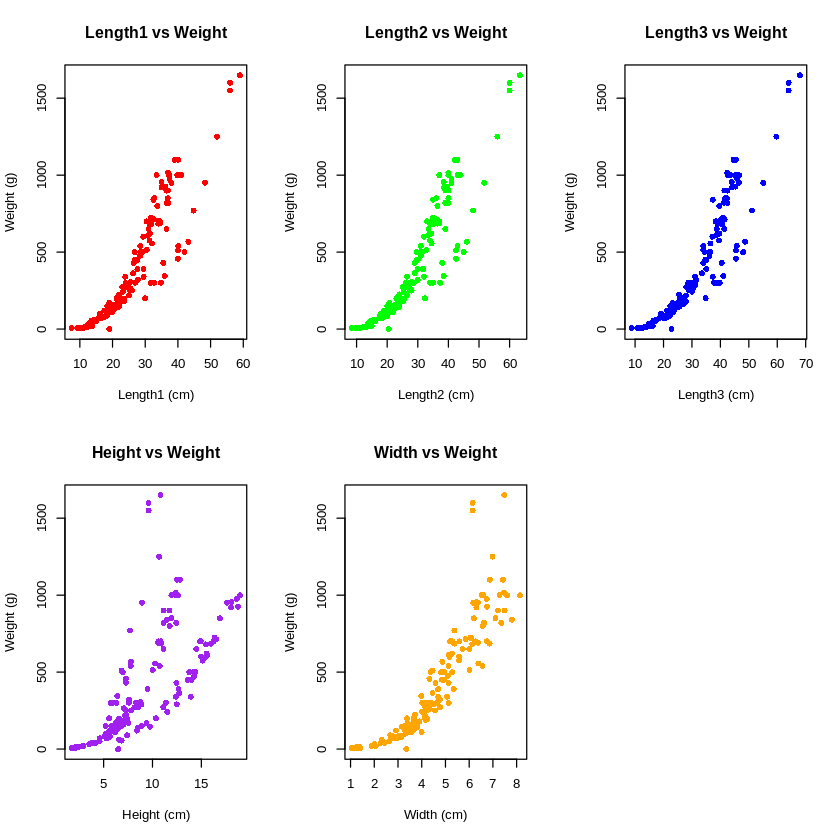

In [ ]:
par(mfrow = c(2,3))

plot(df$Length1, df$Weight, main = "Length1 vs Weight", xlab = "Length1 (cm)", ylab = "Weight (g)", pch = 16, col = "red")

plot(df$Length2, df$Weight, main = "Length2 vs Weight", xlab = "Length2 (cm)", ylab = "Weight (g)", pch = 16, col = "green")

plot(df$Length3, df$Weight, main = "Length3 vs Weight", xlab = "Length3 (cm)", ylab = "Weight (g)", pch = 16, col = "blue")

plot(df$Height, df$Weight, main = "Height vs Weight", xlab = "Height (cm)", ylab = "Weight (g)", pch = 16, col = "purple")

plot(df$Width, df$Weight, main = "Width vs Weight", xlab = "Width (cm)", ylab = "Weight (g)", pch = 16, col = "orange")

par(mfrow = c(1,1))


- The variables 'Length1'(red), 'Length2'(green) and 'Length3'(blue) shows a strong positive correlation with 'weight'.
- The spread has relatively large variance in higer values of lengths.
- Linear Trend (lengths) as the length increases, the weight also increases.
- Height is not highly correlated with weight (purple)
since it is scattered, it has many outliers and there is no linear relationship so height is not reliable for predicting the wight.
- Width shows a positive correlation (orange) with weight but it also has some variance in higher widths.

**Part C:** Use your favorite method in R to fit simple linear regression models to the data. Fit a separate SLR model for each feature.


Once you have fit each model, report the following information about each model:
- intercept value
- slope value
- p-value

In [ ]:
features = c("Length1", "Length2", "Length3", "Height", "Width")

res_df = data.frame(Feature = character(),
                     Intercept = numeric(),
                     Slope = numeric(),
                     P_Value = numeric(),
                     stringsAsFactors = FALSE)

for (feature in features) {
  model = lm(Weight ~ df[[feature]], data = df)
  model_summary = summary(model)
  intercept = model_summary$coefficients[1,1]
  slope = model_summary$coefficients[2,1]
  p_value = model_summary$coefficients[1,4]
  res_df = rbind(res_df, data.frame(Feature = feature,
                                      Intercept = intercept,
                                      Slope = slope,
                                      p_value = p_value))
}
print(res_df)


  Feature Intercept     Slope      p_value
1 Length1 -462.3751  32.79216 2.415227e-30
2 Length2 -473.6490  30.68637 1.295504e-31
3 Length3 -490.4006  28.46017 1.299621e-33
4  Height -144.3860  60.49635 1.881076e-03
5   Width -433.2589 188.24855 4.163981e-23


**Part D:** Use the SLR model from **Part C** for $\texttt{Length3}$ versus $\texttt{Weight}$ to estimate the weight of a fish whose measurement for $\texttt{Length3}=31$ cm.

In [ ]:
intercept_length3 = res_df[res_df$Feature == "Length3", "Intercept"]
slope_length3 = res_df[res_df$Feature == "Length3", "Slope"]
y_pred = intercept_length3 + slope_length3 * 31
y_pred


[1] 391.8647

**Part E:** Looking at all 5 SLR models from **Part C**, what do you notice about the p-values? What inferences could you make from this information.

- The p values are very small ie. less than 0.05 which indicates each feature significantly contributes in predicting the response variable 'weight'
- Smallest p value is for 'Length3' so it is the strongest predictor out of all the predictors.
- The p values of Length1, Length2 and Length3 are extremely smaller (ie. $\text{e}^-30$ and smaller) that represents lengths of fish are highly correlated with the response 'weigth' compared to other predictors such as 'height' and 'width'.

**Part F:(Optional for 4010 Students)**

Now, let's fit a multiiple linear regression model!

Explicitly write out the MLR model using the coefficients that you found so that you have an answer of the form:
$$ \hat{y} = \beta_0+\beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \beta_5 x_5 $$

In [ ]:
mlr_model = lm(Weight ~ Length1 + Length2 + Length3 + Height + Width, data = df)
coeff_mlr_model = coef(mlr_model)

intercept = coeff_mlr_model[1]
beta1 = coeff_mlr_model[2]
beta2 = coeff_mlr_model[3]
beta3 = coeff_mlr_model[4]
beta4 = coeff_mlr_model[5]
beta5 = coeff_mlr_model[6]

intercept
beta1
beta2
beta3
beta4
beta5

(Intercept) 
   -499.587

Length1 
62.35521

Length2 
-6.526752

Length3 
-29.02622

Height 
28.29735

Width 
22.47331

The **Multiple Linear Regression (MLR) equation** using the provided coefficients is:  


$$\hat{y} = -499.5869 + 62.3552 * \text{Length1} - 6.5268 * \text{Length2} - 29.0262 * \text{Length3} + 28.2974 * \text{Height} + 22.4733 * \text{Width}$$


